### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into January. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In January, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx). It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

### Grading

1. Understanding the Data (50 points)


*   Key Metrics (0/10/15/25 points): Identifies useful insights, eg: top-selling products, etc.
*   Seasonal Insights (0/10/15/25 points): Explains trends for January, highlighting any seasonal demands or anomalies in customer behavior.
<br>
<br>

2. Recommending Layout Improvements (50 points)

*   Market Basket Analysis Insights (0/10/15/25 points): Uses association rules to determine logical groupings of products.
*   Placement Ideas (0/10/15/25 points): Provides actionable layout changes idea to increase cross-selling opportunities, such as adjusting the location of high-demand complementary items, eg:
If "Shampoo" is frequently bought with "Soap," they should be placed near each other.




In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
!pip install mlxtend==0.23.1

In [2]:
url = "https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx"
data = pd.read_excel(url)
data.head()

,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,...,DEP_SWA,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,TANGGAL,JAM,LAMA_CRD
0,IN,JUL,NaN,6.0,K,A,AREA,NaN,KERTAS,39390.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:12:02,NaN
1,IN,JUL,NaN,6.0,K,A,AREA,NaN,BTL/DOT,13108.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:24:51,NaN
2,IN,JUL,NaN,6.0,K,A,AREA,NaN,MUSTIKA,5644.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:18,NaN
3,IN,JUL,NaN,6.0,K,A,AREA,NaN,SABUN.C,7273.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:22,NaN
4,IN,JUL,NaN,6.0,K,A,AREA,NaN,LULURMD,12168.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:20,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

In [4]:
data.head()

,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,...,DEP_SWA,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,TANGGAL,JAM,LAMA_CRD
0,IN,JUL,NaN,6.0,K,A,AREA,NaN,KERTAS,39390.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:12:02,NaN
1,IN,JUL,NaN,6.0,K,A,AREA,NaN,BTL/DOT,13108.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:24:51,NaN
2,IN,JUL,NaN,6.0,K,A,AREA,NaN,MUSTIKA,5644.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:18,NaN
3,IN,JUL,NaN,6.0,K,A,AREA,NaN,SABUN.C,7273.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:22,NaN
4,IN,JUL,NaN,6.0,K,A,AREA,NaN,LULURMD,12168.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:20,NaN


In [5]:
data.describe()

,KDSUP,KAS,KDSLS,ITEM,BIN,KDBIN,NO_ORD,SLD_AK,SLD_AKG,QTY,...,PPNBM_OLD,JLH_TRANS,PTS_GDG,PTS_KEL,PTS_ITEM,QTY_PTS,FILLER,SUPPLIER,DEP_SWA,LAMA_CRD
count,40832.000000,136294.000000,0.0,148486.000000,13586.000000,0.0,0.0,11769.000000,9350.000000,148486.000000,...,9350.000000,1.484860e+05,0.0,0.0,0.0,0.0,1.484860e+05,7264.000000,1668.000000,37.0
mean,650.873384,4.497381,NaN,21322.181445,8.858531,NaN,NaN,20.819228,15.819209,3.163174,...,0.001176,6.137361e+04,NaN,NaN,NaN,NaN,1.717615e+11,313.185573,1.182854,0.0
std,467.837803,1.906136,NaN,25881.022963,4.537190,NaN,NaN,70.033381,54.576439,16.266576,...,0.095344,3.981378e+05,NaN,NaN,NaN,NaN,2.951083e+10,463.993685,0.386662,0.0
min,0.000000,1.000000,NaN,1.000000,1.000000,NaN,NaN,-12.000000,-12.000000,1.000000,...,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,1.701010e+11,0.000000,1.000000,0.0
25%,30.000000,3.000000,NaN,5221.000000,6.000000,NaN,NaN,0.000000,0.000000,1.000000,...,0.000000,5.800000e+03,NaN,NaN,NaN,NaN,1.701077e+11,8.000000,1.000000,0.0
50%,999.000000,5.000000,NaN,13839.000000,8.000000,NaN,NaN,3.000000,2.000000,1.000000,...,0.000000,1.270000e+04,NaN,NaN,NaN,NaN,1.701160e+11,69.000000,1.000000,0.0
75%,999.000000,6.000000,NaN,35802.750000,13.000000,NaN,NaN,13.000000,11.000000,2.000000,...,0.000000,3.060000e+04,NaN,NaN,NaN,NaN,1.701251e+11,444.000000,1.000000,0.0
max,1769.000000,15.000000,NaN,700047.000000,19.000000,NaN,NaN,2663.000000,1748.000000,2000.000000,...,9.000000,3.778570e+07,NaN,NaN,NaN,NaN,7.013157e+11,1769.000000,2.000000,0.0


In [6]:

data.describe(include='object')

,KD_SBR,TP_TRN,TRN_DK,GDG,GGD,KEL,NAMA,NO_BKT,STS_BYR,KET_TRANS,TRNBL,POST,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,JAM
count,148486,148486,148486,148486,148486,148486,148486,148486,136294,148486,148486,10552,7050,7050,40321,5651,139076,148486,148486
unique,1,6,2,1,2,246,15971,36588,8,319,1,1,1,2,1,1,6,22,46203
top,IN,JUL,K,A,AREA,SUSU KT,MIE INDOMIE GORENG 84GR,0424/0117,CD,CASH DISCOUNT,N,*,N,N,*,P,S,YULIA,22:07:26
freq,148486,136241,138356,148486,148317,8523,742,199,106437,106487,148486,10552,7050,7034,40321,5651,136197,18950,49


In [7]:
# Count missing values per column
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# Percentage of missing values
missing_percentage = (missing_values / len(data)) * 100
print(missing_percentage[missing_percentage > 0])

KD_SBR           3
TP_TRN           3
KDSUP       107657
KAS          12195
TRN_DK           3
             ...  
TP_ADJ        9413
USER             3
TANGGAL          3
JAM              3
LAMA_CRD    148452
Length: 61, dtype: int64
KD_SBR       0.002020
TP_TRN       0.002020
KDSUP       72.501667
KAS          8.212730
TRN_DK       0.002020
              ...    
TP_ADJ       6.339190
USER         0.002020
TANGGAL      0.002020
JAM          0.002020
LAMA_CRD    99.975082
Length: 61, dtype: float64


In [8]:
# Menghapus baris yang mengandung nilai null
data_cleaned = data.dropna()

# Tampilkan informasi setelah pembersihan
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 61 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   KD_SBR      0 non-null      object        
 1   TP_TRN      0 non-null      object        
 2   KDSUP       0 non-null      float64       
 3   KAS         0 non-null      float64       
 4   TRN_DK      0 non-null      object        
 5   GDG         0 non-null      object        
 6   GGD         0 non-null      object        
 7   KDSLS       0 non-null      float64       
 8   KEL         0 non-null      object        
 9   ITEM        0 non-null      float64       
 10  NAMA        0 non-null      object        
 11  BIN         0 non-null      float64       
 12  KDBIN       0 non-null      float64       
 13  TGL_TRANS   0 non-null      datetime64[ns]
 14  NO_BKT      0 non-null      object        
 15  NO_ORD      0 non-null      float64       
 16  STS_BYR     0 non-null      object    

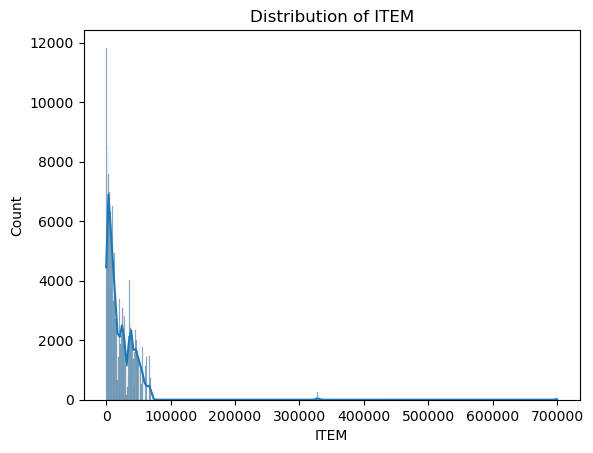

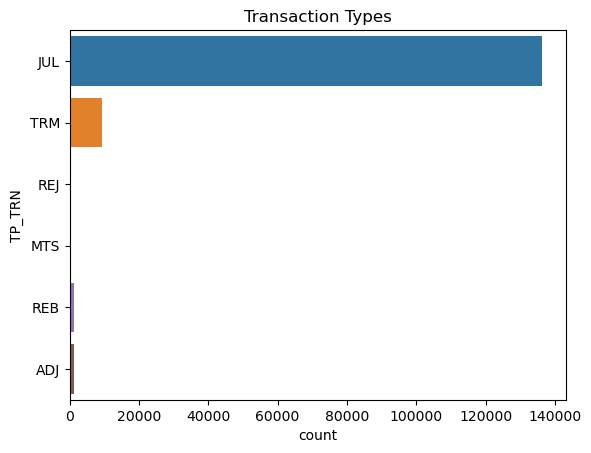

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of numerical columns (example: 'ITEM')
sns.histplot(data['ITEM'], kde=True)
plt.title('Distribution of ITEM')
plt.show()

# Count of categorical values (example: 'TP_TRN')
sns.countplot(y=data['TP_TRN'])
plt.title('Transaction Types')
plt.show()

Sunday       27022
Tuesday      26447
Monday       24201
Wednesday    19323
Friday       18108
Saturday     17557
Thursday     15828
Name: Day_Name, dtype: int64


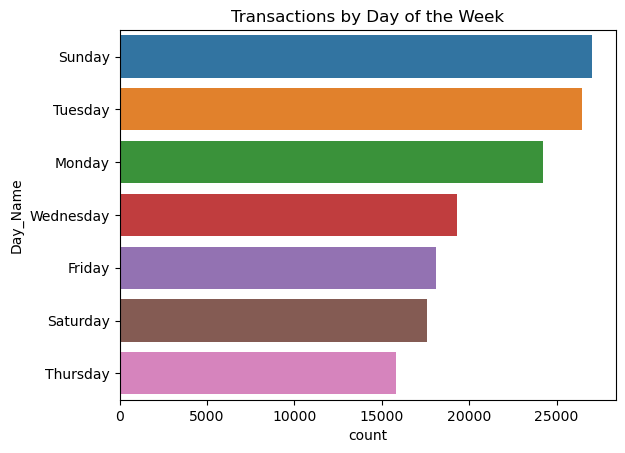

In [11]:
# Convert TANGGAL to datetime
data['TANGGAL'] = pd.to_datetime(data['TANGGAL'], errors='coerce')

# Extract additional time features
data['Day'] = data['TANGGAL'].dt.day
data['Month'] = data['TANGGAL'].dt.month
data['Day_Name'] = data['TANGGAL'].dt.day_name()

# Analyze daily transaction counts
daily_transactions = data['Day_Name'].value_counts()
print(daily_transactions)

# Plot daily transaction counts
sns.countplot(y=data['Day_Name'], order=daily_transactions.index)
plt.title('Transactions by Day of the Week')
plt.show()

Untuk jumlah transaksi setiap hari dalam satu minggu. Terlihat bahwa hari minggu memiliki transaksi paling banyak dibandingkan hari lain.

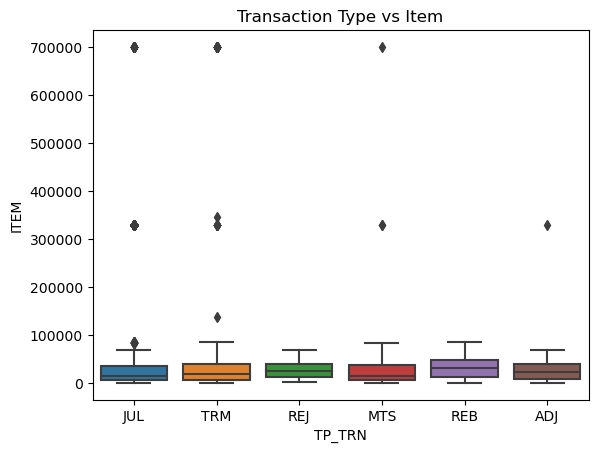

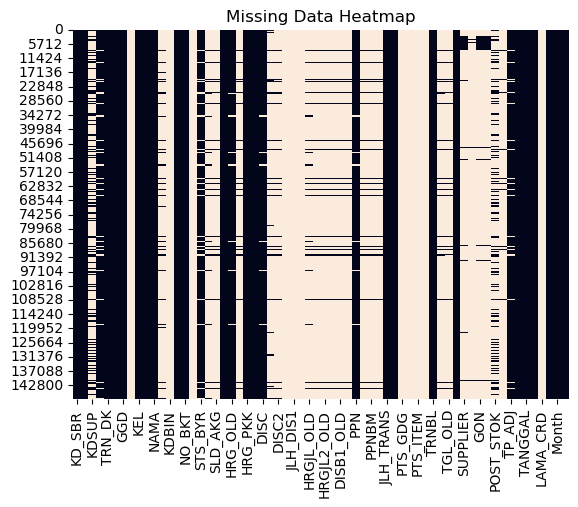

In [12]:
# Analyze 'TP_TRN' vs 'ITEM'
sns.boxplot(x='TP_TRN', y='ITEM', data=data)
plt.title('Transaction Type vs Item')
plt.show()

# Analyze missing data patterns
sns.heatmap(data.isnull(), cbar=False)
plt.title('Missing Data Heatmap')
plt.show()

In [13]:
data= data[['NO_BKT','KEL']]
data.head()

,NO_BKT,KEL
0,060102001,KERTAS
1,060102002,BTL/DOT
2,060102003,MUSTIKA
3,060102003,SABUN.C
4,060102003,LULURMD


In [14]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder


# Ambil data produk (misalnya, kolom 'ITEM') dan buat daftar transaksi
transactions = data.groupby(['NO_BKT','KEL'])['KEL'].count().unstack().reset_index().fillna(0).set_index('NO_BKT')
transactions.head()

KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0003/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0004/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0005/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
encoded = transactions.applymap(lambda x: 1 if x > 0 else 0)
encoded.head()

KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0005/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
from mlxtend.preprocessing import TransactionEncoder

# Transformasikan transaksi ke dalam bentuk biner
te = TransactionEncoder()
te_ary = te.fit_transform(transactions)

# Buat DataFrame dari hasil transformasi
df_biner = pd.DataFrame(te_ary, columns=te.columns_)

In [19]:

from mlxtend.frequent_patterns import apriori, association_rules

# Temukan item yang sering dibeli (frequent itemsets)
frequent_itemsets = apriori(encoded, min_support=0.01, use_colnames=True)

# Temukan association rules berdasarkan frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Tampilkan beberapa aturan teratas yang ditemukan
rules = rules.sort_values('lift', ascending=False)
rules.head()

C:\Users\M.S.I\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
89,(OBATPEL),(SABUNCP),0.029272,0.033372,0.010386,0.354809,10.632053,0.009409,1.498204,0.933263
88,(SABUNCP),(OBATPEL),0.033372,0.029272,0.010386,0.311220,10.632053,0.009409,1.409345,0.937221
172,(P GIGI),"(SIKAT G, SABUN.M)",0.076227,0.014294,0.010277,0.134815,9.431403,0.009187,1.139301,0.967739
169,"(SIKAT G, SABUN.M)",(P GIGI),0.014294,0.076227,0.010277,0.718929,9.431403,0.009187,3.286620,0.906935
175,"(SHAMPOO, SIKAT G)",(P GIGI),0.014896,0.076227,0.010277,0.689908,9.050686,0.009141,2.979031,0.902961


Hasil : Association Rules yang mengungkap kombinasi produk yang sering dibeli bersama, dilengkapi dengan metrik seperti support, confidence, dan lift. Rekomendasi Penempatan yang menentukan produk-produk yang sebaiknya ditempatkan berdekatan